# Predicting the percentage scores of students using Linear Regression

We will predict the percentage scores of students according to their study hours by using linear regression of Python scikit-learn libray.

First, import all the required libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import and read the data.

In [3]:
data_url = "http://bit.ly/w-data"
data = pd.read_csv(data_url)
print("Data had been imported")

data.head(10)

Data had been imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Next, plotting the data set to see how the data are related.

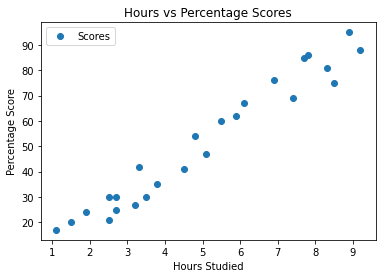

In [4]:
data.plot(x='Hours', y='Scores', style='o')
plt.title("Hours vs Percentage Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

# Preparing the data

Then, divide the data to features and labels.

In [5]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values


After that we will split the data into training and test data sets with sklearn's train_test_split() method.

In [6]:
from sklearn.model_selection import train_test_split  
trainX, testX, trainY, testY = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

# print(trainX)
# print(testX)
# print(trainY)
# print(testY)

# Model Training

Now we will start training the algorithm.

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(trainX, trainY)

print("Training complete")

Training complete


Plotting our regression line inside the data graph 

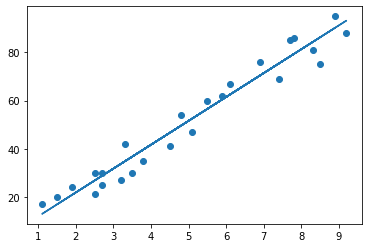

In [8]:
# Plotting the regression line
reg_line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, reg_line);
plt.show()

# Predicting the results

Start predicting the results.

In [9]:
print(testX)
prediction = regressor.predict(testX)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
diff = pd.DataFrame({"Actual": testY, "Prediction": prediction})
print(diff)

   Actual  Prediction
0      20   16.884145
1      27   33.732261
2      69   75.357018
3      30   26.794801
4      62   60.491033


In [11]:
# testing with new data
hours = [9.25, 3.45, 10.2, 17.6]
hrs = np.reshape(hours,(4,1))
test_predictions = regressor.predict(hrs)
new_diff = pd.DataFrame({"hours": hours, "predictions": test_predictions})
print(new_diff)

   hours  predictions
0   9.25    93.691732
1   3.45    36.209925
2  10.20   103.106856
3  17.60   176.445714


# Evaluating the Model 

Finally we will evaluate the performance of the model. 

In [15]:
from sklearn import metrics

mae = metrics.mean_absolute_error(testY, prediction)
mse = metrics.mean_squared_error(testY, prediction, squared=False)

print("Mean Absolute Error: {}".format(mae))
print("Mean Squared Error: {}".format(mse))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 4.647447612100373
